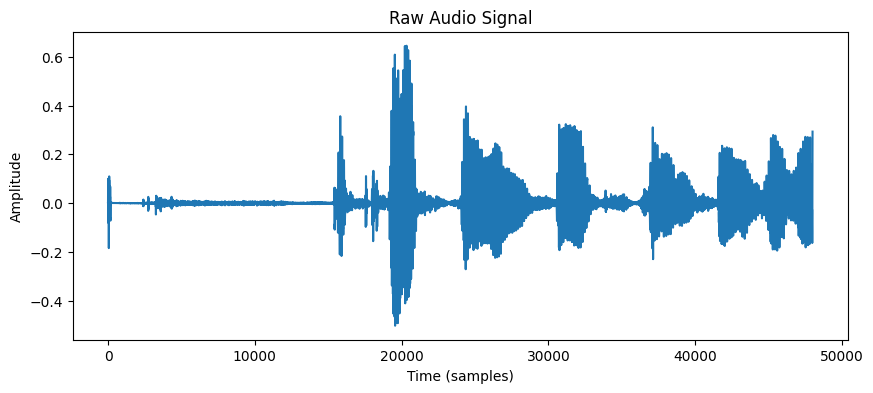

In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

file_path = '/Users/25yoon/PycharmProjects/final_project/test_2.wav'
audio_signal, sampling_rate = librosa.load(file_path, sr=16000)  # sr: sampling rate (16 kHz is common for voice)

# Plot the raw signal
plt.figure(figsize=(10, 4))
plt.plot(audio_signal)
plt.title('Raw Audio Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

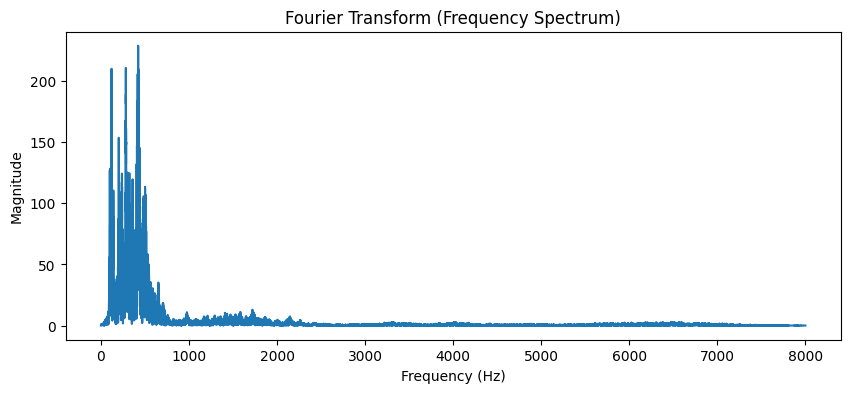

In [2]:
# Perform Fourier Transform using numpy's FFT
fft_signal = np.fft.fft(audio_signal) # this converts the audio into the frequency domain

# Get the magnitude (absolute value) of the FFT to visualize the frequency components
magnitude = np.abs(fft_signal)

# Calculate the corresponding frequencies
frequencies = np.fft.fftfreq(len(magnitude), d=1/sampling_rate) # this computes the corresponding the frequencies

# Plot the Fourier Transform
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2])  # Focus on positive frequencies
plt.title('Fourier Transform (Frequency Spectrum)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
import librosa

# Extract MFCCs (usually 13-40 coefficients are extracted)
mfccs = librosa.feature.mfcc(y=audio_signal, sr=sampling_rate, n_mfcc=13)

# Plot the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()

In [ ]:
import os
import librosa
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

def extract_fourier_features(file_path, n_fft=2048, hop_length=512):
    """
    Extract Fourier Transform features (magnitude spectrum) from an audio file.
    Args:
    - file_path (str): Path to the audio file.
    - n_fft (int): Number of FFT components.
    - hop_length (int): Number of audio samples between successive frames.
    
    Returns:
    - feature_vector (np.array): Flattened vector of Fourier features.
    """
    # Load the audio file (16kHz is a common sample rate for speech)
    y, sr = librosa.load(file_path, sr=16000)
    
    # Perform Short-Time Fourier Transform (STFT)
    D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    
    # Get the magnitude of the STFT (ignore the phase)
    magnitude, _ = librosa.magphase(D)
    
    # Take the log magnitude to reduce large variances in amplitude
    log_magnitude = np.log1p(magnitude)
    
    # Flatten the spectrogram into a feature vector (like an image "flattened")
    feature_vector = log_magnitude.flatten()
    
    return feature_vector
